# Small Worlds
#### This project was made as a collaboration between Lucas Morais Freire and (placeholder).
The dataset used was provided by [alvarofpp](https://github.com/alvarofpp/dataset-flights-brazil)

In [1]:
# install dependencies
%pip install networkx
%pip install nxviz

We will be using the dataset containing airport and flight data in Brazil to conduct a series of analysis using graph theory concepts. We will now lay the groundwork so that the requirements that were set for this project are fulfilled, and for that we will first execute some scripts provided by [alvarofpp](https://github.com/alvarofpp/dataset-flights-brazil). To get up-to-date data, we executed the `extract.py` script, then we built the `.csv` files needed by executing `transform_to_airports_csv.py` and `transform_to_anac_csv.py`. Finally, we executed `transform_to_graphml.py` to build the `.graphml` file. Now that we have our datasets sorted out, it's time to get to the analysis.

In [2]:
#import some libraries that will be needed:
import networkx as nx
import nxviz as nv

c:\Users\lucas.morais.freire.700\AppData\Local\Programs\Python\Python311\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [3]:
# Instantiate a Graph() object and put the data in the .graphml file inside it.
G = nx.Graph()
G = nx.read_graphml('data/air_traffic.graphml')

This graph contains many international flights that will not matter to the discussions presented in this notebook. We will exclude them from this graph:

In [4]:
nodes_to_remove = []

for node_data in G.nodes(data=True):
    if node_data[1]['country'] != 'BRASIL': # if the country is not brazil, we will discard them from the graph.
        nodes_to_remove.append(node_data[0])

G.remove_nodes_from(nodes_to_remove)

for node_data in G.nodes(data=True):
    print(node_data)

print(G)

('SBCF', {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': -19.62444305419922, 'longitude': -43.97194290161133, 'region': 'SUDESTE'})
('SBGL', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458, 'region': 'SUDESTE'})
('SBGR', {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289, 'region': 'SUDESTE'})
('SSUM', {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': -23.7987003326416, 'longitude': -53.31380081176758, 'region': 'SUL'})
('SNBG', {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'latitude': -19.499000549316406, 'longitude': -41.04180145263672, 'region': 'SUDESTE'})
('SSBG', {'name': 'BENTO GONÇALVES', 'country': 'BRASIL', 'latitude': -29.1483325958, 'longitude': -51.5363883972, 'region': 'SUL'})
('SBCV', {'name': 'CARAVELAS', 'country': 'BRASIL', 'latitude': -17.6523, 'longitude': -39.253101, 'region': 'NORDESTE'})
('SBLP', {'name': 'BOM JESUS DA LAPA', 'country': 'BRASI

As you can see, now we have airports in Brazil only. The first requirement of this analysis project is to calculate the assortativity coefficient with respect to the 'region' attribute of each node (airport).

In [5]:
nx.attribute_assortativity_coefficient(G, 'region')

0.3725974224135195

As you can see, the positive value of the assortativity coefficient implies that indeed there is a tendency for flights to occur between airports that are in the same region. We can vizualize this better if we take a look at a map that represents the network:

In [6]:
#import pyplot
from matplotlib import pyplot as plt

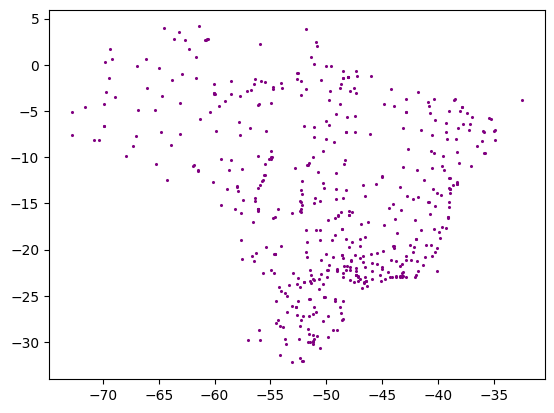

In [33]:
x = [float(coord) for coord in [node[1]['longitude'] for node in G.nodes(data=True)]]
y = [float(coord) for coord in [node[1]['latitude'] for node in G.nodes(data=True)]]
#img = plt.imread('brazilregions.png')
#fig, ax = plt.subplots()
#ax.imshow(img, extent=[-73.99055556, -34.79305556, -33.75194444, 5.571944444])
plt.scatter(x, y, s=1.5, c='purple')
plt.savefig(fname='graph.png', dpi=800)

In [22]:
for node in G.nodes(data=True):
    if min(x) == float(node[1]['longitude']):
        print(node[0])

SWJV


In [6]:
nx.attribute_mixing_matrix(G, "region")

array([[0.07267951, 0.00711471, 0.01335377, 0.04060858, 0.01204028],
       [0.00711471, 0.13222417, 0.02035902, 0.02758319, 0.02287653],
       [0.01335377, 0.02035902, 0.08231173, 0.05461909, 0.0107268 ],
       [0.04060858, 0.02758319, 0.05461909, 0.17294221, 0.0339317 ],
       [0.01204028, 0.02287653, 0.0107268 , 0.0339317 , 0.05341506]])

In [7]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
nx.degree_assortativity_coefficient(G, 'region')


-0.19605264855558172

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

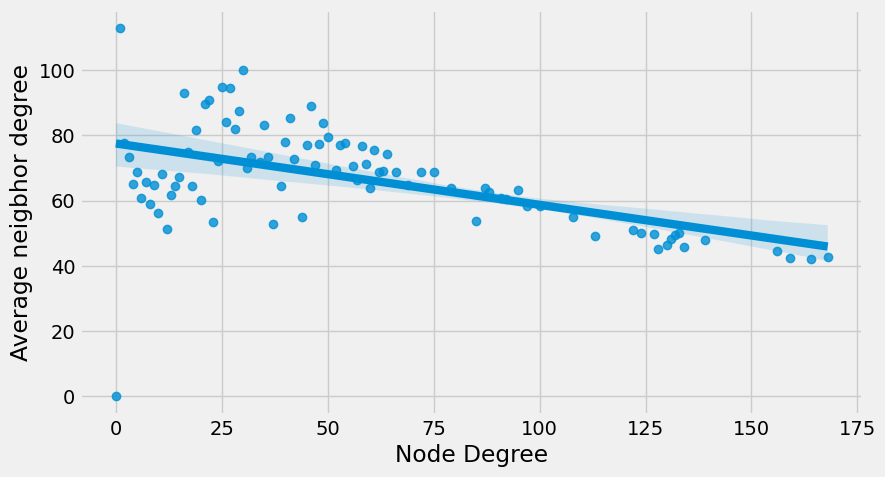

In [9]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [10]:
nx.number_connected_components(G)

6

In [11]:
S = nx.connected_components(G)

for component in list(S):
    print(component)


{'SBCO', 'SBAT', 'SBFI', 'SJUR', 'SNQD', 'SWNA', 'SNGQ', 'SSUW', 'SBBE', 'SNKK', 'SNBR', 'SNGA', 'SNVV', 'SWLV', 'SBKP', 'SDRS', 'SSCT', 'SBIC', 'SNFX', 'SWTP', 'SWKN', 'SNJB', 'SNAT', 'SNFE', 'SWHG', 'SDVG', 'SNYA', 'SWJV', 'SNPY', 'SWJU', 'SNDB', 'SBMA', 'SNNU', 'SBSC', 'SWCI', 'SNCC', 'SSNC', 'SSPK', 'SNXB', 'SNCI', 'SSCR', 'SWJH', 'SNQX', 'SBPM', '2NHT', 'SNML', 'SWJW', 'SWMW', 'SDWQ', 'SNZA', 'SDPA', 'SBBU', 'SBUG', 'SNQG', 'SBGR', 'SBMI', 'SBOI', 'SWBR', 'SBIH', 'SBIZ', 'SNCT', 'SBMO', 'SNRS', 'SBPG', 'SBSR', 'SNDT', 'SWBV', 'SWEK', 'SSCP', 'SNBA', 'SNBV', 'SBRJ', 'SWKO', 'SNAR', 'SDZG', 'SIFC', 'SBCX', 'SBGU', 'SNMJ', 'SNAX', 'SBMK', 'SBLP', 'SWBI', 'SBCA', 'SNMK', 'SSSK', 'SBUF', 'SBSJ', 'SDCG', 'SNMU', 'SSBN', 'SDNM', 'SWYN', 'SSBB', 'SBJR', 'SJLU', 'SIFV', 'SSVI', 'SBPF', 'SSPG', 'SNQY', 'SILC', 'SBTS', 'SDH2', 'SBAF', 'SSDO', 'SSAE', 'SBBI', 'SBAA', 'SWPF', 'SWSQ', 'SWNS', 'SWKC', 'SNFO', 'SNOS', 'SBPI', 'SWGN', 'SNGI', 'SNSM', 'SSKW', 'SWUY', 'SBTK', 'SSCK', 'SWBU', 'SNRU',

In [12]:

S = nx.connected_components(G)
for i, comp in enumerate(list(S)):
    sudeste = norte = nordeste =  sul = centroOeste = 0
    for airp in comp:
        if nx.get_node_attributes(G, 'region')[airp] == 'NORTE':
            norte += 1
        if nx.get_node_attributes(G, 'region')[airp] == 'SUDESTE':
            sudeste +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'SUL':
            sul +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'CENTRO-OESTE':
            centroOeste +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'NORDESTE':
            nordeste +=1
    
    print("no conjunto ",i, 100*(norte/len(comp)),"NORTE")
    print("no conjunto ",i, 100*(sudeste/len(comp)),"SUDESTE")
    print("no conjunto ",i, 100 * nordeste/len(comp),"NORDESTE")
    print("no conjunto ",i, 100 * centroOeste/len(comp),"CENTRO-OESTE")
    print("no conjunto ",i, 100* sul/len(comp),"SUL")

no conjunto  0 24.95049504950495 NORTE
no conjunto  0 23.564356435643564 SUDESTE
no conjunto  0 18.81188118811881 NORDESTE
no conjunto  0 17.821782178217823 CENTRO-OESTE
no conjunto  0 14.851485148514852 SUL
no conjunto  1 0.0 NORTE
no conjunto  1 100.0 SUDESTE
no conjunto  1 0.0 NORDESTE
no conjunto  1 0.0 CENTRO-OESTE
no conjunto  1 0.0 SUL
no conjunto  2 100.0 NORTE
no conjunto  2 0.0 SUDESTE
no conjunto  2 0.0 NORDESTE
no conjunto  2 0.0 CENTRO-OESTE
no conjunto  2 0.0 SUL
no conjunto  3 0.0 NORTE
no conjunto  3 0.0 SUDESTE
no conjunto  3 0.0 NORDESTE
no conjunto  3 100.0 CENTRO-OESTE
no conjunto  3 0.0 SUL
no conjunto  4 0.0 NORTE
no conjunto  4 100.0 SUDESTE
no conjunto  4 0.0 NORDESTE
no conjunto  4 0.0 CENTRO-OESTE
no conjunto  4 0.0 SUL
no conjunto  5 100.0 NORTE
no conjunto  5 0.0 SUDESTE
no conjunto  5 0.0 NORDESTE
no conjunto  5 0.0 CENTRO-OESTE
no conjunto  5 0.0 SUL


# CIDADE 1 NORTE: SNYA, CIDADE 2 SUL: SBPF, #CIDADE 3 NORDESTE: SNPP,
# CIDADE 4 CENTRO-OESTE: SJVO,  CIDADE 5 SUDESTE: SDBK

In [13]:
# ROTA MAIS CURTA DO NORTE PARA O SUL
# BOA VISTA PARA FLORIANOPOLIS - PREÇO MÉDIO R$1832,00 - GOL - TEMPO DE VOO 8H20MIN - DIA 1 - 18/06 - 
# SAIDA 2:55 - CHEGADA 12:15 
print(nx.shortest_path(G,"SBBV","SBFL"))
print(nx.shortest_path_length(G,"SBBV","SBFL"))

['SBBV', 'SBFL']
1


In [14]:
# ROTA MAIS CURTA DO SUL PARA O NORDESTE
# FLORIANOPOLIS PARA RECIFE - PREÇO MÉDIO R$637,00 - LATAM - TEMPO DE VOO 11H20MIN - DIA 2 - 19/06
# SAIDA 11:15 - CHEGADA 22:35
print(nx.shortest_path(G,"SBFL","SBRF"))
print(nx.shortest_path_length(G,"SBFL","SBRF"))


['SBFL', 'SBRF']
1


In [15]:
# ROTA MAIS CURTA DO NORDESTE PARA O CENTRO-OESTE
# RECIFE PARA VARZEA GRANDE - PREÇO MÉDIO - R$1538,00 - LATAM - TEMPO DE VOO 6H20MIN - 20/06
# SAIDA 12:12 - CHEGADA 17:30
print(nx.shortest_path(G,"SBRF","SBCY"))
print(nx.shortest_path_length(G,"SBRF","SBCY"))

['SBRF', 'SBCY']
1


In [16]:
# ROTA MAIS CURTA DO CENTRO-OESTE PARA O SUDESTE
#VARZEA GRANDE PARA SAO PAULO - PREÇO MÉDIO R$585,00 - AZUL - TEMPO DE VOO 2H10MIN
# SAIDA 20:20 - CHEGADA 23:30
print(nx.shortest_path(G,"SBCY","SBSP"))
print(nx.shortest_path_length(G,"SBCY","SBSP"))

['SBCY', 'SBSP']
1


In [17]:
import copy

Gnorte = copy.deepcopy(G)
Gnorte.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'NORTE'])
Gnordeste = copy.deepcopy(G)
Gnordeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'NORDESTE'])
Gsul = copy.deepcopy(G)
Gsul.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'SUL'])
Gsudeste = copy.deepcopy(G)
Gsudeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'SUDESTE'])
GcentroOeste = copy.deepcopy(G)
GcentroOeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'CENTRO-OESTE'])
print(nx.average_clustering(G))
print(nx.average_clustering(Gnorte))
print(nx.average_clustering(Gnordeste))
print(nx.average_clustering(Gsul))
print(nx.average_clustering(Gsudeste))
print(nx.average_clustering(GcentroOeste))
print(nx.clustering(G))
print(nx.clustering(Gnorte))
print(nx.clustering(Gnordeste))
print(nx.clustering(Gsul))
print(nx.clustering(Gsudeste))
print(nx.clustering(GcentroOeste))


0.6298820670024339
0.6129174483757455
0.4901000932205856
0.5907956617622269
0.6055274251271584
0.5665069530501539
{'SBCF': 0.29049897470950103, 'SBGL': 0.28487161693268565, 'SBGR': 0.2114342743085258, 'SSUM': 0.7142857142857143, 'SNBG': 0, 'SSBG': 0, 'SBCV': 0.725, 'SBLP': 0.6666666666666666, 'SBSV': 0.270698766881973, 'SNGI': 0.6909090909090909, 'SNTF': 0.7948717948717948, 'SBAR': 0.6327868852459017, 'SBMO': 0.5358558558558558, 'SBPL': 0.6579591836734694, 'SNBR': 0.6007130124777184, 'SNVR': 0, 'SBKP': 0.23200992555831265, 'SBBV': 0.4, 'SBFL': 0.44533547179898425, 'SBPA': 0.28308961379827524, '1AON': 0.9555555555555556, 'SBAA': 0.7032967032967034, 'SBAS': 0.9934640522875817, 'SBAU': 0.6998299319727891, 'SBBE': 0.25900758533501894, 'SBBH': 0.20738794681952075, 'SBBR': 0.26128662287561255, 'SBCG': 0.44670846394984326, 'SBCH': 0.4581920903954802, 'SBCJ': 0.5372340425531915, 'SBCT': 0.2880368513751524, 'SBCY': 0.24186046511627907, 'SBDN': 0.5647721454173067, 'SBEG': 0.22268700787401574, 'S